<a href="https://colab.research.google.com/github/alberzenon/AprendizajeAutomatico/blob/main/Actividad_10_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.4.2
    Uninstalling typer-0.4.2:
      Successfully uninstalled typer-0.4.2


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
from fcmeans import FCM
from sklearn import datasets

In [ ]:
#customer_data = pd.read_csv('shopping_data.csv')
iris = datasets.load_iris()
print("Dataset loaded successfully")


In [14]:
# data frame 
Data = pd.DataFrame(iris.data, columns = iris.feature_names)
Data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
Data.shape

(150, 4)

In [27]:
data = Data.iloc[:, 2:4].values

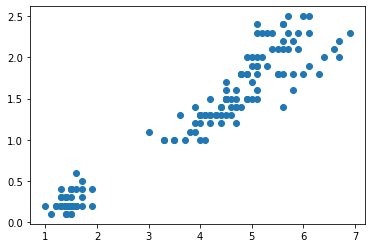

In [28]:
# plot result
plt.scatter(data[:,0], data[:,1])
plt.show()

In [29]:
#Creacion del modelo defieniendo los clusteres iniciales
fcm = FCM(n_clusters=5)

In [30]:
#entrenamiento del modelo
fcm.fit(data)

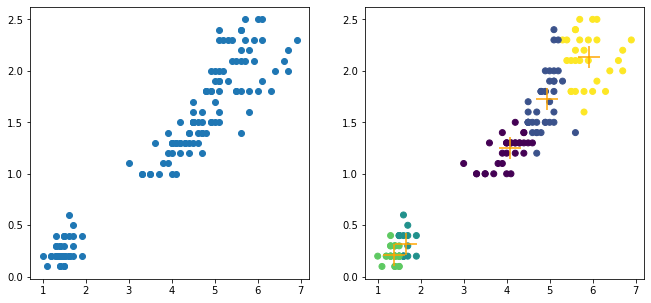

In [31]:
#obtencion de los centroides y ejecucion de las predicciones
fcm_centers = fcm.centers
fcm_labels = fcm.predict(data)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(data[:,0], data[:,1])
axes[1].scatter(data[:,0], data[:,1], c=fcm_labels)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='orange')
plt.show()

In [32]:
fcm_labels

array([3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2,
       3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       2, 3, 2, 3, 3, 3, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4,
       1, 1, 4, 1, 1, 4, 4, 4, 4, 1, 4, 1, 4, 1, 4, 4, 1, 1, 4, 4, 4, 4,
       4, 1, 1, 4, 4, 4, 1, 4, 4, 1, 1, 4, 4, 1, 1, 1, 4, 1])

## Problema resuelto con K-Means

In [33]:
from sklearn.cluster import KMeans
modelo_kmeans = KMeans(n_clusters=5, n_init=25, random_state=123)
modelo_kmeans.fit(data)
y_predict = modelo_kmeans.predict(data)

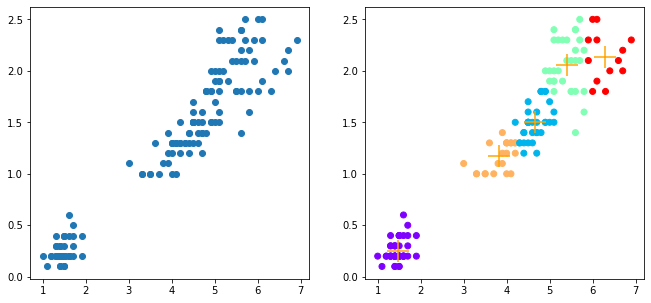

In [34]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(data[:,0], data[:,1])
axes[1].scatter(data[:,0], data[:,1], c = modelo_kmeans.labels_, cmap='rainbow')
axes[1].scatter(modelo_kmeans.cluster_centers_[:,0], modelo_kmeans.cluster_centers_[:,1], marker="+", s=500, c='orange')
plt.show()

In [35]:
print(fcm_centers)
print(modelo_kmeans.cluster_centers_)

[[4.07475242 1.25006831]
 [4.93053908 1.72846758]
 [1.64786427 0.31612193]
 [1.38007695 0.21560678]
 [5.90601682 2.1382218 ]]
[[1.462      0.246     ]
 [4.64857143 1.5       ]
 [5.39666667 2.05333333]
 [3.83181818 1.16818182]
 [6.28461538 2.13846154]]


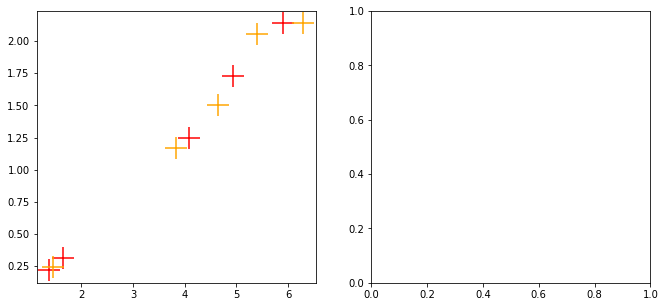

In [36]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='red')
axes[0].scatter(modelo_kmeans.cluster_centers_[:,0], modelo_kmeans.cluster_centers_[:,1], marker="+", s=500, c='orange')
plt.show()

## Dendograma (Agrupamiento Jerárquico )

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [38]:
linked_complete = linkage(data, 'complete')

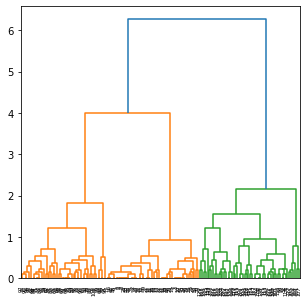

In [39]:
plt.figure(figsize=(5, 5))
dendrogram(linked_complete,
  orientation='top',
    distance_sort='descending',
    show_leaf_counts=True)
plt.show()

## Cálculo del índice silhouette

In [40]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [41]:
rg_de_grupos= range(2,10)
val_silhouette = []

In [42]:
for numero_clusters in rg_de_grupos:
 modelo = AgglomerativeClustering(
       affinity = 'euclidean',
       linkage = 'complete',
       n_clusters = numero_clusters
      )

 etiquetas_cluster = modelo.fit_predict(data)
 silhouette_avg = silhouette_score(data, etiquetas_cluster)
 val_silhouette.append(silhouette_avg)

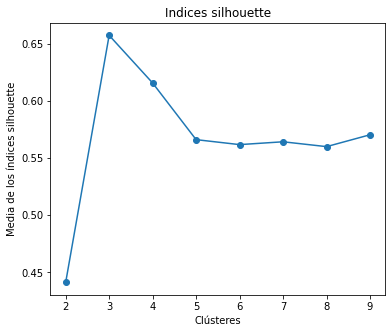

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.plot(rg_de_grupos, val_silhouette, marker='o')
ax.set_title("Indices silhouette")
ax.set_xlabel('Clústeres')
ax.set_ylabel('Media de los índices silhouette');